<h2 align="center">Room Occupancy Detection Using Sensor Data</h2>

<img src="https://i.imgur.com/cEEtXzX.png" width="560" height="480"></img>

### Task 1: Introduction and Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline   
#so we get graphs and output within notebook
import warnings      #to ignore warnings of compatibility issues in packages
warnings.simplefilter('ignore')
import numpy as np
import yellowbrick as yb

### Task 2: Anscombe's Quartet

It has 4 datasets, similar but appear completely different on graph. So, each dataset of the 4 has 11 points. Also, wanted to show effect of outliers.

***

***

In [2]:
#data

x = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])


In [3]:
# verify the summary statistics
pairs = (x,y1), (x,y2), (x,y3), (x4,y4)

for x, y in pairs:
    print('Mean=%1.2f, std=%1.2f, r=%1.2f' %(np.mean(y), np.std(y), np.corrcoef(x,y)[0][1]))
    #atleast 1 significant decimal point, and after rounding 2 decimal 

#we will notice that all the stats are totally identical    

Mean=7.50, std=1.94, r=0.82
Mean=7.50, std=1.94, r=0.82
Mean=7.50, std=1.94, r=0.82
Mean=7.50, std=1.94, r=0.82


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

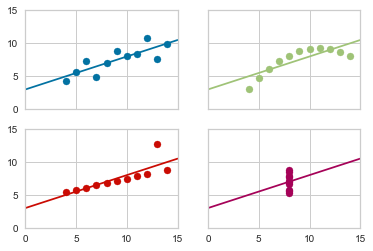

In [4]:
#visualize
g = yb.anscombe()
plt.show()

The blue graph shows clean +ve linear model.

The green graph shows non-normal distribution.

The red graph shows linear distribution but calculated regression is affacted by outlier.

The last graph shows high correlation co-efficent althought that is not the case.

<h2 align=center> Feature Analysis </h2>

Components:
1. `Define` a bounded, high dimensional feature space that can be effectively modeled.
2. `Transform` and manipulate the space to make modeling eaier.
3. `Extract` a feature representation of each instance in the space.

### Task 3: Load the Classification Data
***


***

In [5]:
# Load the classification data set
data = pd.read_csv('occupancy.csv')
data.head()

#columns are attributes/ features
# each row is instance
# 0 is unoccupied, 1 is occupied

,datetime,temperature,relative humidity,light,C02,humidity,occupancy
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
3,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
4,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [6]:
# Specify the features of interest
#list of features
features = ['temperature', 'relative humidity', 'light', 'C02', 'humidity']
classes = ['Unoccupied', 'Occupied']

In [7]:
# Extract the instances and target
X = data[features]
y = data.occupancy

### Task 4: Feature Analysis - Scatter Plot
***
How do we select the correct features that affact the target.

Machine Learning uses Highly dimensional features.

Features have to be reduced to most meaningful.
***

<bound method Visualizer.poof of ScatterVisualizer(alpha=1.0,
                  ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001E5B652D860>,
                  classes=['Unoccupied', 'Occupied'], color=None, colormap=None,
                  features=['light', 'C02'],
                  markers=<itertools.cycle object at 0x000001E5B68C3090>,
                  x='light', y='C02')>

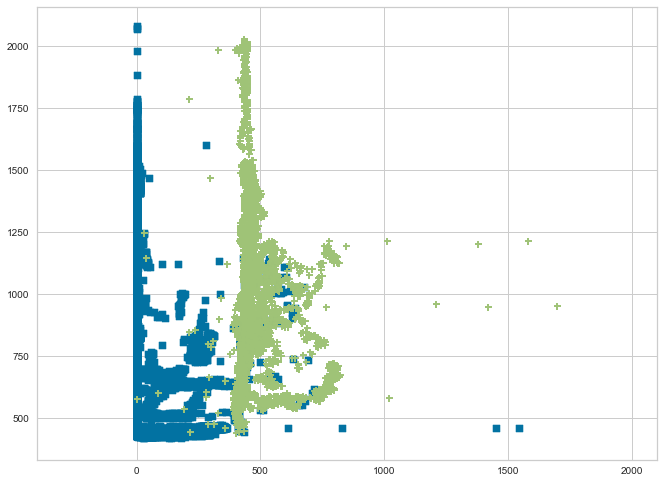

In [8]:
#In scikit learner estimator phase, we have estimators and transformers
#estimators are the main API implemented by scikit-learn
#In python, everything is an object

#Visualizer in yb is based on data rather than new datasets to make predictions
#poof is equivalent to plt.show or matplotlib.draw

from yellowbrick.contrib.scatter import ScatterVisualizer

visualizer = ScatterVisualizer(x= 'light',
                               y= 'C02',
                               classes = classes,    #classes (un)occupied
                               size=(800, 600)   #pixels size
                              )
visualizer.fit(X, y)   #our actual dataset
visualizer.transform(X)    #only the input data
visualizer.poof            #funny info: poof and yb are names from wizard of oz :)

#green is occupied, blue is unoccupied
#this makes sense abit

### Task 5: Feature Analysis - RadViz

In [9]:
from yellowbrick.features.radviz import RadViz

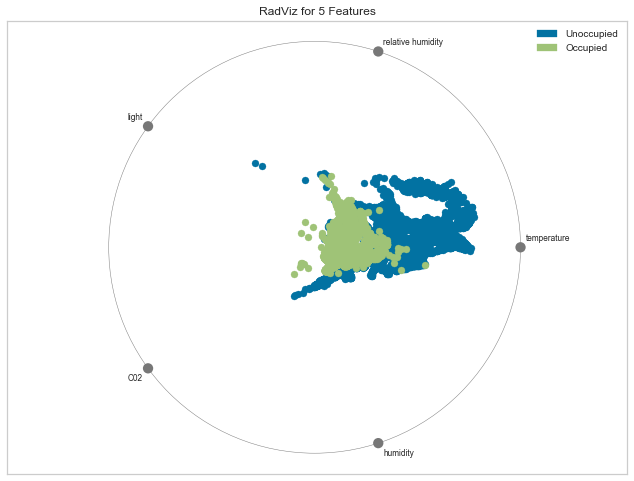

In [10]:
# Instantiate the visualizer
visualizer = RadViz(classes= classes, features= features, size= (800, 600))

# Fit the data to the visualizer
visualizer.fit(X, y)

# Transform the data
visualizer.transform(X)

# Draw/show/poof the data
visualizer.poof()

 Above graph shows that temperature is very predictive.
 
 Clustering? Separability? Here shown non-linear variability.

### Task 6: Feature Analysis - Parallel Coordinates Plot
***

***

In [11]:
from yellowbrick.features.pcoords import ParallelCoordinates

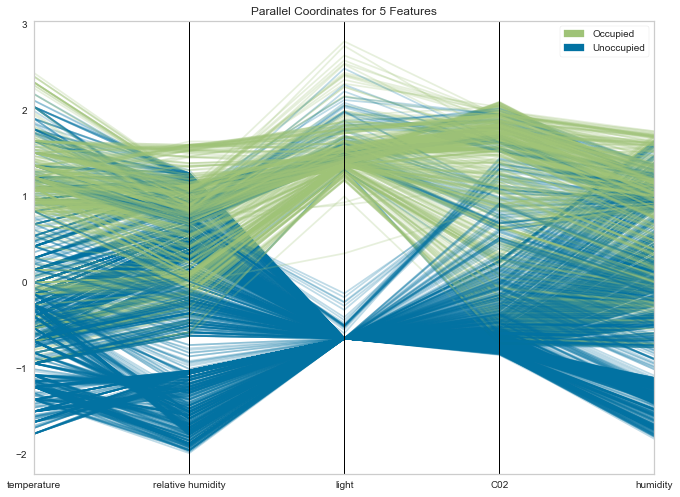

In [12]:
# Instantiate the visualizer
visualizer = ParallelCoordinates(classes = classes,
                                 features=features,
                                 normalize='standard',
                                 sample = 0.1,
                                 size = (800,600)
                                )

# Fit the data to the visualizer
visualizer.fit(X, y)

# Transform the data
visualizer.transform(X)

# Draw/show/poof the data
visualizer.poof()

 #### This visualization shows us quickly feature separation. The instances are drawn as line segments, from horizontal axis.
 
Unoccupied show lower light levels than occupied.

C02 is abit messy.

Unoccupied rooms have temperature lower than occupied ones.

### Task 7: Feature Analysis - Rank Features
***

***

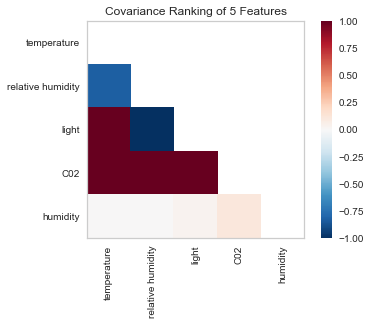

In [13]:
# Instantiate the visualizer with the Covariance ranking algorithm
from yellowbrick.features.rankd import Rank2D

visualizer = Rank2D(features=features,
                   algorithm = 'Covariance' #this is already the default
                   )
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

The above shows colinearity between features that are given

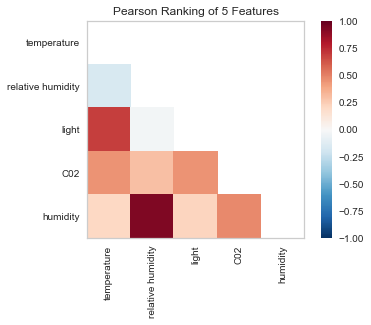

In [14]:
# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(features=features,
                   algorithm = 'pearson'
                   )
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

##### Pearson ranking algorithm is:

A linear correlation algorithm to detect colinear relationships.

### Task 8: Feature Analysis - Manifold Visualization
***
Changes into 2D, nearest neighbor clustering to capture non-linear.
***

In [15]:
from yellowbrick.features.manifold import Manifold

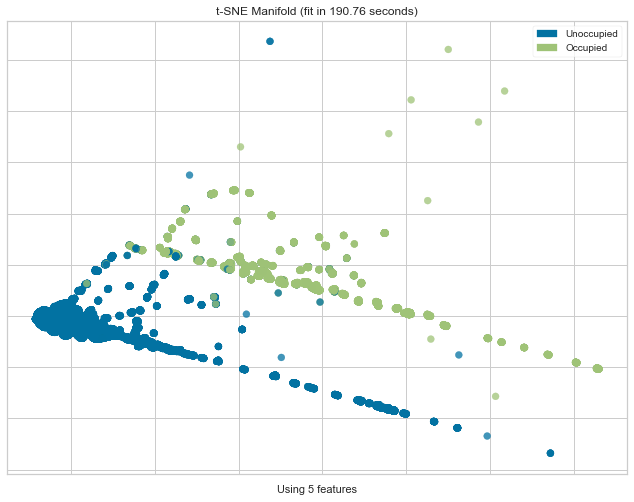

In [16]:
#This cell takes almost 6 minutes
#to fasten it, sample or scale the data or decrease sparsity, or select k-best
#which select best features with target
visualizer = Manifold(manifold='tsne',
                      target='discrete',   #occupancy is either 1 or 0
                      classes=classes,
                      size=(800,600)
                     )
visualizer.fit_transform(X,y)
visualizer.poof()

<h2 align=center> Model Selection and Evaluation </h2>

1. Choose a `model family` that best captures the relationship between the variables of interest.
2. Define a `model form` that specifies exactly how features interact to make a prediction.
3. Train a `fitted model` by optimizing internal parameters to the data.

### Task 9: ROC/AUC Plots
***

***

In [17]:
# Create the train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2)

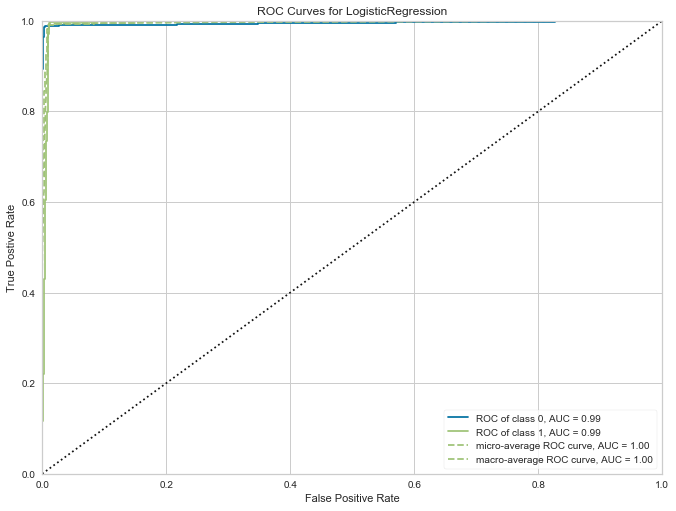

In [18]:
from yellowbrick.classifier import ROCAUC
from sklearn.linear_model import LogisticRegression   #family of model and form of model

# Instantiate the classification model and visualizer
visualizer = ROCAUC(LogisticRegression(), size=(800,600))

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw/show/poof the data
g = visualizer.poof()


The above shows ROC, AUC curve. The steepness of the curve just jumps up which is amazing.

### Task 10: Classification Report and Confusion Matrix
***

***

In [19]:
from yellowbrick.classifier import ClassificationReport

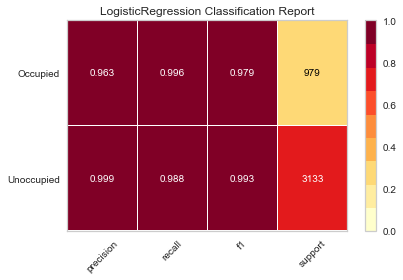

In [20]:
visualizer = ClassificationReport(LogisticRegression(),
                                 classes = classes,
                                 support=True)       
        #The actual number of occurances 1's & 0's in a dataset
        #good in imbalanced data to show structural weakness
        #might show need for stratified sampling and so on
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
g = visualizer.poof()

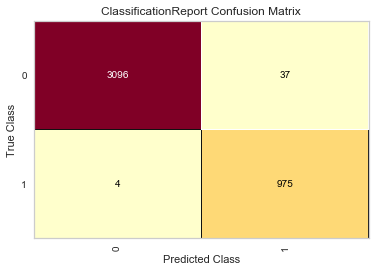

In [21]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(visualizer, classes=[0,1])
cm.score(X_test, y_test)
cm.poof()

### Task 11: Cross Validation Scores
***
1) Shuffling of data to avoid availability bias

2) Splits data into K-folds

3) Training Split, Test Split

4) Final model is fit on entire model for operational purposes
***

In [22]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores

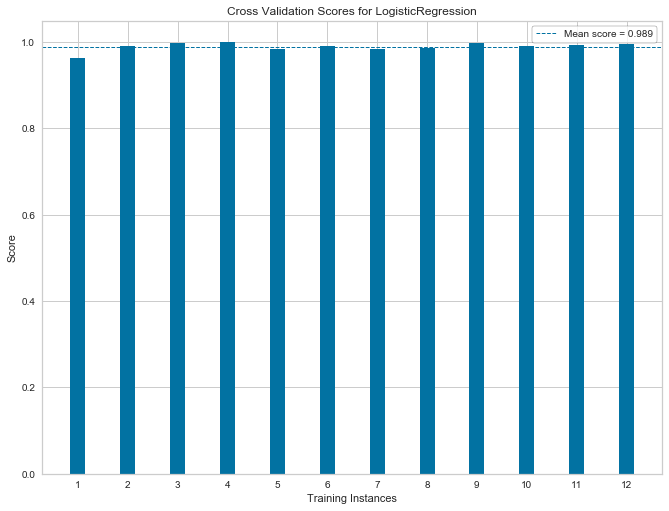

In [23]:
# Create a new figure and axes
f, ax = plt.subplots()

# Create a cross-validation strategy
cv = StratifiedKFold(12)

# Create the CV score visualizer
oz = CVScores(LogisticRegression(),
             ax = ax,
             cv = cv,
             scoring = 'f1_weighted',   #to sense relationship between precision and recall
             size = (800,600)
             )
oz.fit(X, y)
oz.poof()

### Task 12: Evaluating Class Balance
***
Does my data have a class imbalance? Does the model correctly evaluate it? would a decision tree be better? or do i need to do stratified sampling? or get more data? over-sampling?
***

In [24]:
from yellowbrick.classifier import ClassBalance

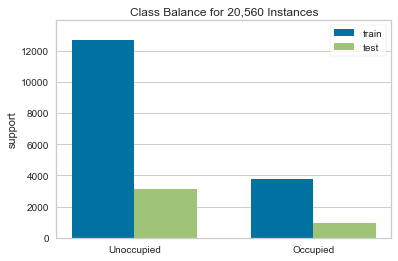

In [25]:
#Instantiate it
visualizer = ClassBalance(labels = classes)

visualizer.fit(y_train, y_test)  #this will provide side by side division in both
visualizer.poof()

 Occupied is very unrepresented in the datasets.
 Here stratified sampling would ensure that test data has same proportion of classes of training data.

### Task 13: Discrimination Threshold for Logistic Regression
***
Probability that +ve score is chosen over -ve class.

Used for binary class, not multi-class.
***

Discrimination threshold has default of 50%

In [26]:
from yellowbrick.classifier import DiscriminationThreshold

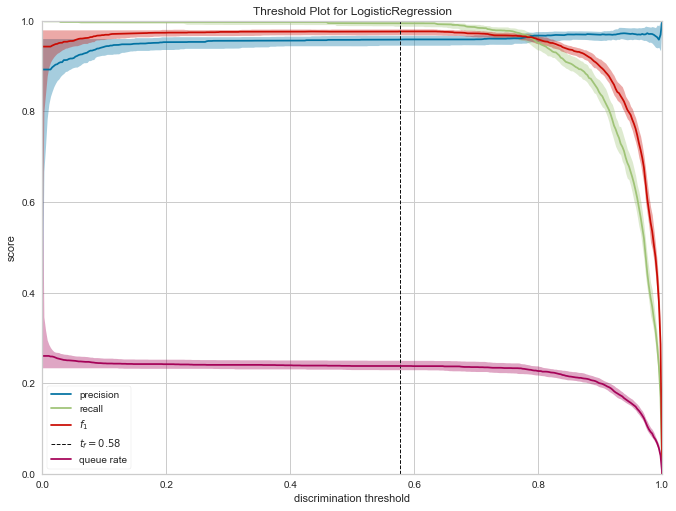

In [27]:
visualizer = DiscriminationThreshold(LogisticRegression(),
                                    size=(800,600))
visualizer.fit(X_train, y_train)
visualizer.poof()